## The Environment Parameters
* Use discount factor, $\gamma = 0.9$
* The environment is slippery, ie., the transition kernel is stochastic
* The environment consists of 16 states. 
* The agent can take 4 actions 

In [50]:
import gym
env = gym.make('FrozenLake-v1', desc=None,map_name="4x4", is_slippery=True)
gamma = 0.9

In [99]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)

Number of Actions 4
Number of States  16


## Generating a Heatmap 
* Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy. 
* This function also prints the value function and policy. 

In [278]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

# Q Learning 
Define Q* from value iteration or policy iterations

In [279]:
import numpy as np

Q_opt = [
 [0.0688909,  0.066648,   0.066648,   0.05975891],
 [0.03909164, 0.0429902,  0.0407473,  0.06141457],
 [0.07440976, 0.06882903, 0.07272759, 0.0574895 ],
 [0.03906513, 0.03906513, 0.03348439, 0.05580732],
 [0.09185454, 0.07118727, 0.06429818, 0.04822363],
 [0,          0,          0,          0,        ],
 [0.11220821, 0.08988528, 0.11220821, 0.02232293],
 [0,          0,          0,           0,       ],
 [0.07118727, 0.11787999, 0.10180545, 0.14543635],
 [0.15761168, 0.24749695, 0.20386605, 0.13351618],
 [0.29961759, 0.26595513, 0.22536851, 0.10791155],
 [0,          0,          0,          0,        ],
 [0,          0,          0,          0,        ],
 [0.18822986, 0.30568681, 0.3799359,  0.26595513],
 [0.39557209, 0.63902015, 0.61492466, 0.53719938],
 [0,          0,          0,          0,        ]]

### Start Q learning

In [289]:
Q = np.zeros((env.observation_space.n, env.action_space.n))

episodes = 10000
max_step = 100

alphaInit = 0.1
alpha = alphaInit

epsilonInit = 0.8
epsilon = epsilonInit

# Decrease epsilon and alpha as we progress though episodes, getting closer to convergence
def getEpsilon(episode):
    return epsilonInit*(1-episode/episodes)

def getAlpha(episode):
    return alphaInit*(1-episode/episodes)

# epsilon greedy selection of action
def chooseAction(state, episode):
    if np.random.uniform(0,1) < getEpsilon(episode):
        return env.action_space.sample()
    else:
#       Get greedy option and break ties randomly
        maxQ = max(Q[state])
        indices = [index for index, element in enumerate(Q[state]) if element == maxQ]
        if len(indices) > 1:
            return np.random.choice(indices)
        else: 
            return indices.pop()
        
norm = []
G = np.zeros(episodes)

for i in range(episodes):
    state = env.reset()
    alpha = getAlpha(i)
    for step in range(max_step):    
        action =  chooseAction(state, i)#Random Action
        n_state,reward,terminal,_ = env.step(action) #Take a step 
        G[i] = reward + gamma*G[i] #Compute G - cumulative reward for each episode
        Q[state, action] = Q[state, action] + alpha*(reward + gamma*max(Q[n_state])  - Q[state, action])         
        state = n_state 
        if terminal:
            break
#   Find L2 form and append it
    norm.append(LA.norm(np.subtract(Q, np.array(Q_opt))))
    
  

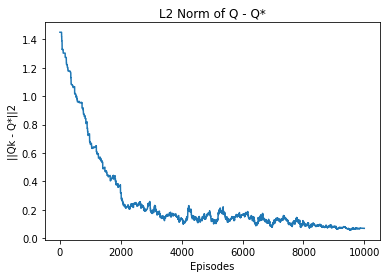

In [290]:
plt.plot(range(len(norm)), norm)
plt.xlabel('Episodes')
plt.ylabel('||Qk - Q*||2')
plt.title("L2 Norm of Q - Q*")
plt.show()

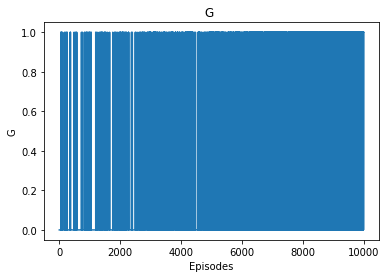

In [291]:
plt.plot(range(episodes), G)
plt.xlabel('Episodes')
plt.ylabel('G')
plt.title("G ")
plt.show()

Q value Array:
 [[0.06672089 0.06164384 0.06240344 0.05751762]
 [0.04220884 0.04104974 0.04000533 0.05753014]
 [0.06877837 0.06461043 0.06797853 0.0561083 ]
 [0.03587369 0.03638472 0.02870287 0.05315132]
 [0.08720851 0.07119791 0.06701516 0.04722351]
 [0.         0.         0.         0.        ]
 [0.10067336 0.08079549 0.09850111 0.02319535]
 [0.         0.         0.         0.        ]
 [0.06946524 0.11239276 0.10523367 0.1372115 ]
 [0.15126123 0.23360984 0.20766078 0.13423249]
 [0.28540791 0.25291631 0.22731632 0.10612408]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.16182007 0.30078055 0.35783464 0.2854996 ]
 [0.39492887 0.602412   0.59178356 0.5381506 ]
 [0.         0.         0.         0.        ]]
Value Function [0.0667208888879936, 0.05753014463240522, 0.06877837475642427, 0.05315131783795922, 0.08720851085032201, 0.0, 0.10067335833161954, 0.0, 0.13721149987039102, 0.23360983640162844, 0.28540790583275627, 0.0, 0.0, 0.35783

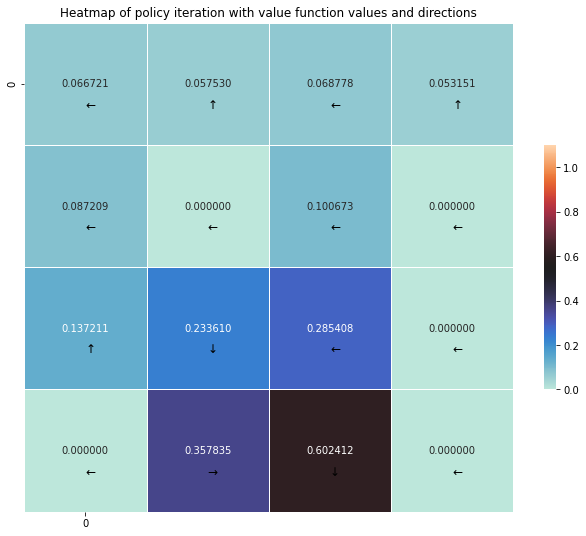

In [292]:
print("Q value Array:\n", np.array(Q))
pi = [np.argmax(Q_s) for Q_s in Q]
# print("Policy: ", pi)
V_opt = [Q[i][pi[i]] for i in range(env.observation_space.n)]
# print("Value: ", V_opt)
fancy_visual(V_opt,pi) 

## Moving Average

In [293]:
window = 100
def movingAverage(array, n=100):
    movingSum = np.cumsum(np.array(array))
    movingSum[n:] = movingSum[n:] - movingSum[:-n]
    return movingSum/n

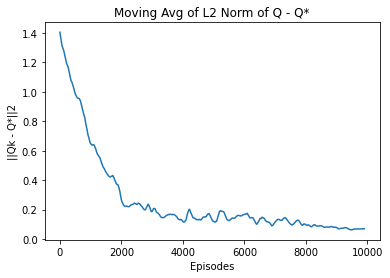

In [294]:
avgNorm = movingAverage(norm)
plt.plot(range(len(avgNorm[window:])), avgNorm[window:])
plt.xlabel('Episodes')
plt.ylabel('||Qk - Q*||2')
plt.title("Moving Avg of L2 Norm of Q - Q*")
plt.show()


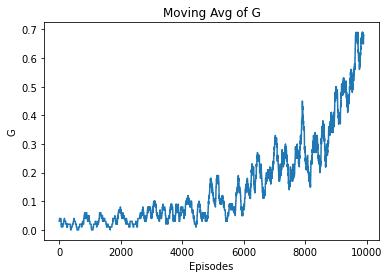

In [295]:
avgG = movingAverage(G)
plt.plot(range(len(avgG[window:])), avgG[window:])
plt.xlabel('Episodes')
plt.ylabel('G')
plt.title("Moving Avg of G")
plt.show()